In [27]:
!pip install -q tensorflow==2.18


In [3]:
import tensorflow as tf
print("TF version:", tf.__version__)


2025-08-25 19:50:35.163492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756151435.189777    1493 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756151435.197571    1493 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TF version: 2.18.0


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Rice_Citation_Request.txt
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (11154).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8058).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (5150).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8267).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8747).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (2970).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (10959).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (4976).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (730).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (9279).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (534).jpg
/kaggle/i

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import keras
from __future__ import print_function
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalMaxPooling2D,BatchNormalization


num_classes=5
batch_size=32
data_augmentation=True
shuffle=True

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # یا '3' برای خاموش کردن همه لاگ‌ها
import tensorflow as tf


In [6]:
data_path="/kaggle/input/rice-image-dataset/Rice_Image_Dataset"

In [7]:
arborio=os.listdir(r"/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio")
basmati=os.listdir(r"/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati")
ipsala=os.listdir(r"/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala")
jasmine=os.listdir(r"/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine")
karacadag=os.listdir(r"/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag")

In [8]:
print(f"Number of image present in arborio file : ",len(arborio))
print(f"Number of image present in basmati file : ",len(basmati))
print(f"Number of image present in ipsala file : ",len(ipsala))
print(f"Number of image present in jasmine file : ",len(jasmine))
print(f"Number of image present in karacadag file : ",len(karacadag))

Number of image present in arborio file :  15000
Number of image present in basmati file :  15000
Number of image present in ipsala file :  15000
Number of image present in jasmine file :  15000
Number of image present in karacadag file :  15000


In [9]:
# نمایش نمونه‌ای از تصاویر هر کلاس
print("Sample of Arborio:\n", arborio[:5])
print("="*50)
print("Sample of Basmati:\n", basmati[:5])
print("="*50)
print("Sample of Ipsala:\n", ipsala[:5])
print("="*50)
print("Sample of Jasmine:\n", jasmine[:5])
print("="*50)
print("Sample of Karacadag:\n", karacadag[:5])


Sample of Arborio:
 ['Arborio (5529).jpg', 'Arborio (3530).jpg', 'Arborio (2360).jpg', 'Arborio (154).jpg', 'Arborio (4561).jpg']
Sample of Basmati:
 ['basmati (6626).jpg', 'basmati (6742).jpg', 'basmati (14507).jpg', 'basmati (6881).jpg', 'basmati (14357).jpg']
Sample of Ipsala:
 ['Ipsala (6145).jpg', 'Ipsala (699).jpg', 'Ipsala (6177).jpg', 'Ipsala (4185).jpg', 'Ipsala (11569).jpg']
Sample of Jasmine:
 ['Jasmine (11070).jpg', 'Jasmine (14345).jpg', 'Jasmine (11645).jpg', 'Jasmine (2544).jpg', 'Jasmine (3468).jpg']
Sample of Karacadag:
 ['Karacadag (11154).jpg', 'Karacadag (8058).jpg', 'Karacadag (5150).jpg', 'Karacadag (8267).jpg', 'Karacadag (8747).jpg']


نمونه برای چک عکس ها Checking 6 Image of type of rice

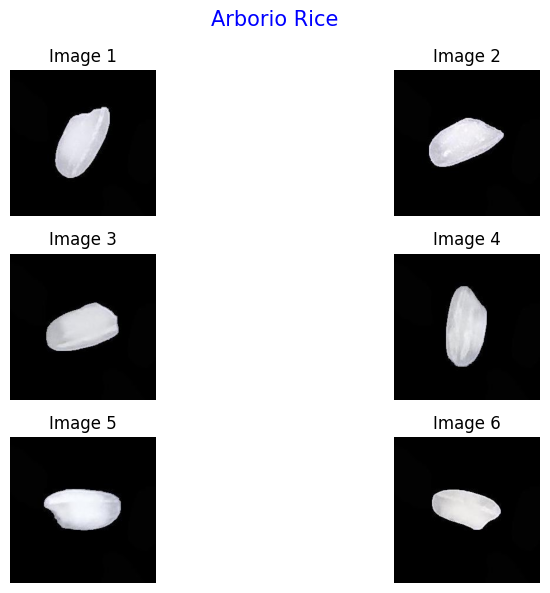

In [10]:

arborio_folder="/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio"
plt.figure(figsize=(10,6))
plt.suptitle("Arborio Rice",color="Blue",fontsize=15)
for idx,paths in enumerate(arborio[:6]):
    join_path=os.path.join(arborio_folder,paths)
    img=mpimg.imread(join_path)
    plt.subplot(3,2,idx + 1)
    implot=plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {idx+1}")
plt.tight_layout()
plt.show()

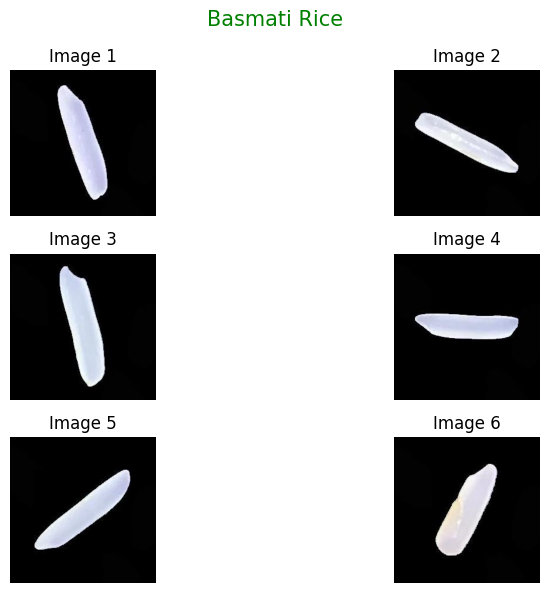

In [11]:
Basmati_folder="/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati"
plt.figure(figsize=(10,6))
plt.suptitle("Basmati Rice",color="Green",fontsize=15)
for idx,paths in enumerate(basmati[:6]):
    plt.subplot(3,2,idx + 1)
    join_path=os.path.join(Basmati_folder,paths)
    img=mpimg.imread(join_path)
    plt.imshow(img)
    plt.axis("Off")
    plt.title(f"Image {idx+1}")
plt.tight_layout()
plt.show()

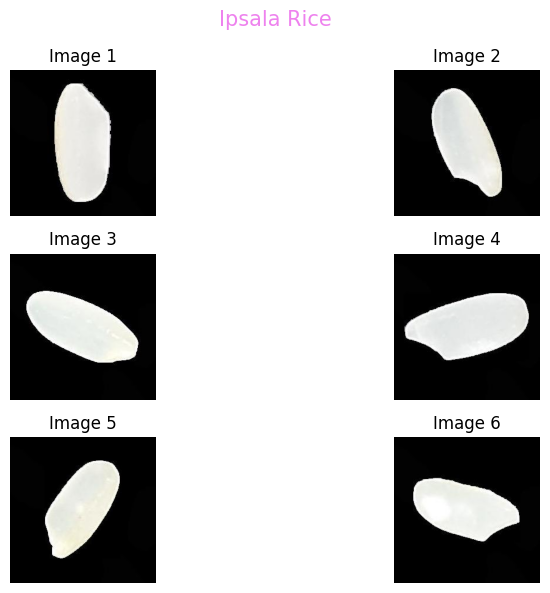

In [12]:
ipsala_folder="/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala"
plt.figure(figsize=(10,6))
plt.suptitle("Ipsala Rice",color="violet",fontsize=15)
for idx,paths in enumerate(ipsala[:6]):
    plt.subplot(3,2,idx + 1)
    join_path=os.path.join(ipsala_folder,paths)
    img=mpimg.imread(join_path)
    plt.imshow(img)
    plt.axis("Off")
    plt.title(f"Image {idx+1}")
plt.tight_layout()
plt.show()

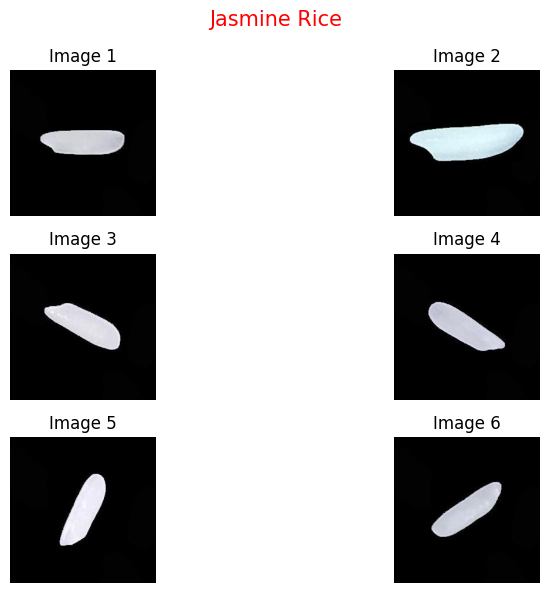

In [13]:
jasmine_folder="/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine"
plt.figure(figsize=(10,6))
plt.suptitle("Jasmine Rice",color="Red",fontsize=15)
for idx,paths in enumerate(jasmine[:6]):
    plt.subplot(3,2,idx + 1)
    join_path=os.path.join(jasmine_folder,paths)
    img=mpimg.imread(join_path)
    plt.imshow(img)
    plt.axis("Off")
    plt.title(f"Image {idx+1}")
plt.tight_layout()
plt.show()

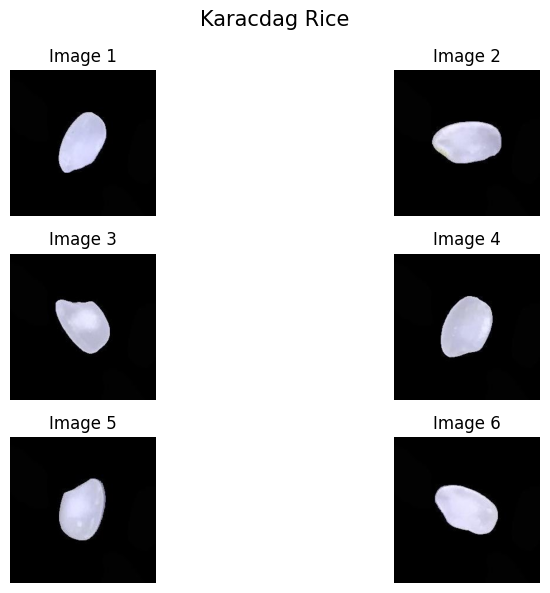

In [14]:
karacadag_folder="/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag"
plt.figure(figsize=(10,6))
plt.suptitle("Karacdag Rice",color="black",fontsize=15)
for idx,paths in enumerate(karacadag[:6]):
    plt.subplot(3,2,idx + 1)
    join_path=os.path.join(karacadag_folder,paths)
    img=mpimg.imread(join_path)
    plt.imshow(img)
    plt.axis("Off")
    plt.title(f"Image {idx+1}")
plt.tight_layout()
plt.show()

تقسیم داده‌ها به train/val/test (75% / 12.5% / 12.5%)

نرمال‌سازی تصاویر به [0,1]

آماده‌سازی tf.data.Dataset برای model.fit

In [15]:
# چک کن متغیر وجود دارد یا نه
print("'IMG_SIZE' in globals():", 'IMG_SIZE' in globals())

# اگر وجود دارد، مقدار و نوعش را ببین
if 'IMG_SIZE' in globals():
    print("IMG_SIZE =", IMG_SIZE, " type:", type(IMG_SIZE))
else:
    print("IMG_SIZE تعریف نشده — احتمالا باید سل پیکربندی را اجرا کنی یا آن را تعریف کنی.")



'IMG_SIZE' in globals(): False
IMG_SIZE تعریف نشده — احتمالا باید سل پیکربندی را اجرا کنی یا آن را تعریف کنی.


In [16]:
from sklearn.model_selection import train_test_split
from pathlib import Path


BASE_PATH = Path("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")

SEED = 42
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# جمع‌آوری تصاویر و برچسب‌ها




rows = [{"path": str(f), "label": f.parent.name} 
        for cls in BASE_PATH.iterdir() if cls.is_dir() 
        for f in cls.glob("*.jpg")]
df = pd.DataFrame(rows)

# تقسیم train / val / test
train_df, rem_df = train_test_split(df, test_size=0.25, stratify=df['label'], random_state=SEED)
val_df, test_df = train_test_split(rem_df, test_size=0.5, stratify=rem_df['label'], random_state=SEED)

# تابع ساخت Dataset
def ds(df, shuffle=False, aug=False):
    labels = pd.factorize(df['label'])[0]
    d = tf.data.Dataset.from_tensor_slices((df['path'].values, labels))
    if shuffle: d = d.shuffle(len(df), seed=SEED)
    def _proc(p, l):
        i = tf.image.decode_jpeg(tf.io.read_file(p), 3)
        i = tf.image.resize(i, IMG_SIZE) / 255.0

        return i, l
    d = d.map(_proc)
    if aug: d = d.map(lambda i,l: (tf.image.random_flip_left_right(i), l))
    return d.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = ds(train_df, shuffle=True, aug=True)
val_ds = ds(val_df)
test_ds = ds(test_df)

for imgs, lbls in train_ds.take(1):
    print(imgs.shape, lbls.shape)

I0000 00:00:1756151476.084423    1493 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756151476.085281    1493 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


(32, 224, 224, 3) (32,)


(32, 224, 224, 3) → یک batch از تصاویر

32 → تعداد تصاویر در یک batch (BATCH_SIZE = 32)

224, 224 → اندازه‌ی تصویر (IMG_SIZE = (224, 224))

3 → کانال‌های رنگی (RGB)

(32,) → برچسب‌های متناظر با همان 32 تصویر در batch

هر عنصر یک عدد (index کلاس) است

ابتدا کل داده‌ها را از پوشه‌ها جمع کردیم و برچسب (label) گذاشتیم.

بعد با train_test_split تقسیم کردیم:

train_df → شامل 75٪ کل داده‌ها

val_df → شامل نصف باقی‌مانده یعنی 12.5٪ کل داده‌ها

test_df → شامل نصف باقی‌مانده یعنی 12.5٪ کل داده‌ها

train_test_split(df, test_size=0.25)
→ train_df = 75٪ کل داده‌ها
→ rem_df = 25٪ باقی‌مانده

مرحله ۲:
train_test_split(rem_df, test_size=0.5)
→ val_df = نصف rem_df = 12.5٪ کل داده‌ها
→ test_df = نصف rem_df = 12.5٪ کل داده‌ها

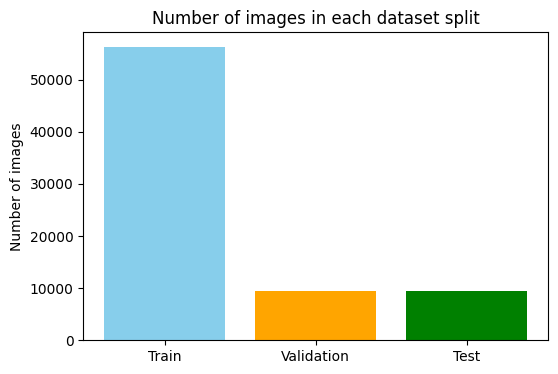

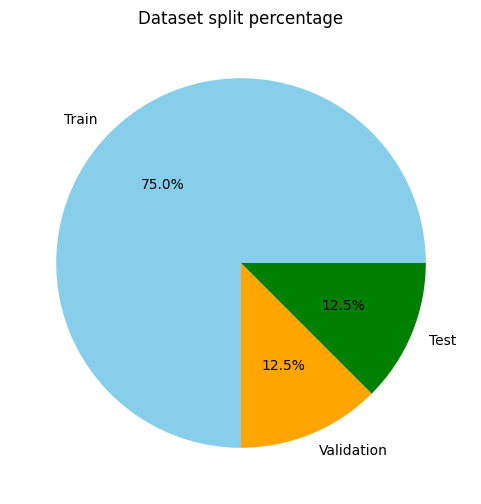

In [17]:
import matplotlib.pyplot as plt

# تعداد نمونه‌ها
counts = [len(train_df), len(val_df), len(test_df)]
labels = ['Train', 'Validation', 'Test']

# نمودار ستونی
plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['skyblue','orange','green'])
plt.title('Number of images in each dataset split')
plt.ylabel('Number of images')
plt.show()

# نمودار دایره‌ای
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue','orange','green'])
plt.title('Dataset split percentage')
plt.show()


In [18]:
# تعداد نمونه‌ها در هر کلاس
print("Train set class distribution:")
print(train_df['label'].value_counts())
print("\nValidation set class distribution:")
print(val_df['label'].value_counts())
print("\nTest set class distribution:")
print(test_df['label'].value_counts())


Train set class distribution:
label
Jasmine      11250
Karacadag    11250
Arborio      11250
Basmati      11250
Ipsala       11250
Name: count, dtype: int64

Validation set class distribution:
label
Ipsala       1875
Basmati      1875
Jasmine      1875
Karacadag    1875
Arborio      1875
Name: count, dtype: int64

Test set class distribution:
label
Basmati      1875
Ipsala       1875
Arborio      1875
Jasmine      1875
Karacadag    1875
Name: count, dtype: int64


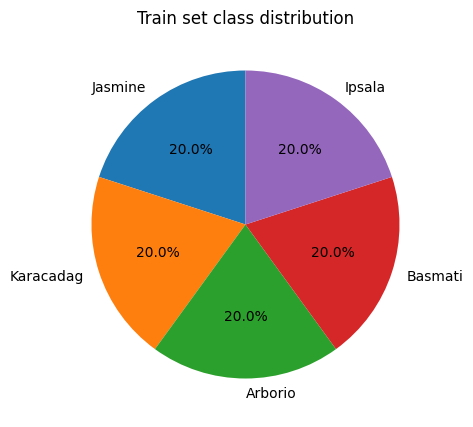

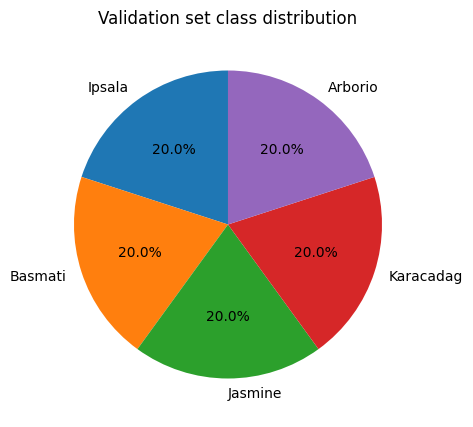

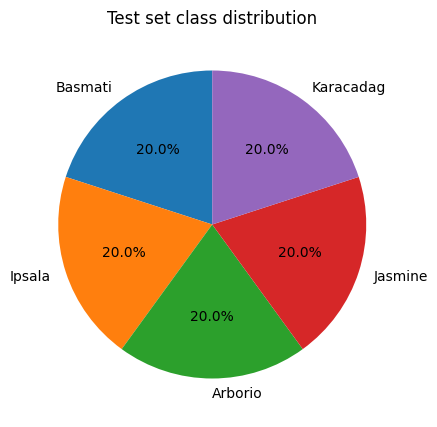

In [19]:
sets = {'Train': train_df, 'Validation': val_df, 'Test': test_df}

for name, df_set in sets.items():
    counts = df_set['label'].value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'{name} set class distribution')
    plt.show()

pd.concat([...]) همه DataFrame ها را ردیف‌به‌ردیف به هم می‌چسباند

In [20]:
# فرض کنیم train_df, val_df, test_df داریم
all_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# اضافه کردن ست (اختیاری) برای مشخص کردن هر نمونه
all_df['set'] = ['train']*len(train_df) + ['val']*len(val_df) + ['test']*len(test_df)

print(all_df.head())
print(all_df['set'].value_counts())

                                                path      label    set
0  /kaggle/input/rice-image-dataset/Rice_Image_Da...    Jasmine  train
1  /kaggle/input/rice-image-dataset/Rice_Image_Da...    Jasmine  train
2  /kaggle/input/rice-image-dataset/Rice_Image_Da...  Karacadag  train
3  /kaggle/input/rice-image-dataset/Rice_Image_Da...    Jasmine  train
4  /kaggle/input/rice-image-dataset/Rice_Image_Da...  Karacadag  train
set
train    56250
val       9375
test      9375
Name: count, dtype: int64


In [21]:
IMG_SIZE = 224  # سایز جدید تصویر
BATCH_SIZE = 16  # یا حتی 

SEED = 42

# تابع پردازش تصویر: resize + نرمال‌سازی
def process_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)       # decode jpg
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])  # resize به 224x224
    img = img / 255.0                                 # ریسکل به [0,1]
    return img, label

# مثال برای train dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'].values, pd.factorize(train_df['label'])[0]))
train_ds = train_ds.shuffle(len(train_df), seed=SEED)
train_ds = train_ds.map(process_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# برای val و test هم به همین شکل:
val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'].values, pd.factorize(val_df['label'])[0]))
val_ds = val_ds.map(process_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_df['path'].values, pd.factorize(test_df['label'])[0]))
test_ds = test_ds.map(process_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# تست سریع
for imgs, lbls in train_ds.take(1):
    print(imgs.shape, lbls.shape)


(16, 224, 224, 3) (16,)


(32, 240, 240, 3) → ۳۲ تصویر در این batch

32 → تعداد تصاویر در batch (BATCH_SIZE)

224 × 224 → سایز هر تصویر

3 → تعداد کانال رنگی (RGB)

(32,) → ۳۲ برچسب مربوط به همان تصاویر
تصاویر با ابعاد 240×240 و سه کانال رنگی آماده هستند

برچسب‌ها هم درست کنار تصاویر قرار دارند

همه آماده‌اند برای feed شدن به مدل در model.fit()

**alexNet **

Dropout یک تکنیک برای جلوگیری از overfitting است.

وقتی Dropout فعال است، در هر epoch به صورت تصادفی تعدادی نورون خاموش می‌شوند و وزن‌شان به شبکه منتقل نمی‌شود.

0.5 یعنی نیمی از نورون‌ها در آن لایه به‌طور تصادفی غیرفعال می‌شوند در هر بار آموزش.

هدف این است که شبکه نتواند به جزئیات training data بیش از حد وابسته شود و generalization روی داده‌های جدید بهتر شود.

In [22]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# DROP_RATE = 0.5
# num_classes = len(train_df['label'].unique())
# IMG_SIZE = 224  # سایز تصاویر

# def AlexNet_Light_Small(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=num_classes, drop_rate=DROP_RATE):
#     model = Sequential([
#         Conv2D(32, (11,11), strides=4, activation='relu', input_shape=input_shape),
#         BatchNormalization(),
#         MaxPooling2D((3,3), strides=2),

#         Conv2D(64, (5,5), padding='same', activation='relu'),
#         BatchNormalization(),
#         MaxPooling2D((3,3), strides=2),

#         Conv2D(128, (3,3), padding='same', activation='relu'),
#         Conv2D(128, (3,3), padding='same', activation='relu'),
#         MaxPooling2D((3,3), strides=2),

#         Flatten(),
#         Dense(512, activation='relu'),   # کاهش واحد Dense
#         Dropout(drop_rate),
#         Dense(256, activation='relu'),   # کاهش واحد Dense
#         Dropout(drop_rate),
#         Dense(num_classes, activation='softmax')
#     ])
#     return model

# model_small = AlexNet_Light_Small()
# model_small.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model_small.summary()


In [23]:
# EPOCHS = 3  # برای تست اولیه

# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=EPOCHS
# )



# ه MobileNetV2
قبلاً ResNet50 اورفیت داشت و حالا می‌خوای روی CPU سبک آموزش بدی، بهترین گزینه MobileNetV2 با لایه‌های بالایی ساده و Dropout هست. این نسخه سبک و سریع هست و احتمال اورفیتینگ کمتری داره.

In [24]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)


Num GPUs Available: 2
TensorFlow version: 2.18.0


In [25]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # فقط GPU اول
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)


Visible devices cannot be modified after being initialized


In [26]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path

# ------------------ تنظیمات ------------------
BASE_PATH = Path("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
SEED = 42
DROP_RATE = 0.5
EPOCHS = 3  # روی CPU کوتاه انتخاب شده

# ------------------ ساخت DataFrame ------------------
rows = [{"path": str(f), "label": f.parent.name} 
        for cls in BASE_PATH.iterdir() if cls.is_dir() 
        for f in cls.glob("*.jpg")]
df = pd.DataFrame(rows)

train_df, rem_df = train_test_split(df, test_size=0.25, stratify=df['label'], random_state=SEED)
val_df, test_df = train_test_split(rem_df, test_size=0.5, stratify=rem_df['label'], random_state=SEED)

# یک mapping ثابت برای کلاس‌ها
all_labels = pd.concat([train_df['label'], val_df['label'], test_df['label']])
_, uniques = pd.factorize(all_labels)
label_to_index = {lab: i for i, lab in enumerate(uniques)}

train_df['label_idx'] = train_df['label'].map(label_to_index)
val_df['label_idx'] = val_df['label'].map(label_to_index)
test_df['label_idx'] = test_df['label'].map(label_to_index)

num_classes = len(uniques)

# ------------------ tf.data Dataset ------------------
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

def augment(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img, 0.1)
    return img, label

def df_to_ds(df, shuffle=False, augment_data=False):
    ds = tf.data.Dataset.from_tensor_slices((df['path'].values, df['label_idx'].values))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df), seed=SEED)
    ds = ds.map(preprocess, num_parallel_calls=AUTOTUNE)
    if augment_data:
        ds = ds.map(augment, num_parallel_calls=AUTOTUNE)
    return ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)

train_ds = df_to_ds(train_df, shuffle=True, augment_data=True)
val_ds = df_to_ds(val_df)
test_ds = df_to_ds(test_df)

# ------------------ ساخت مدل ------------------
base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1],3))
base.trainable = False  # freeze base

x = GlobalAveragePooling2D()(base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(DROP_RATE)(x)
out = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base.input, outputs=out)

model.compile(optimizer=Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ------------------ callbacks ------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint("best_mobilenetv2.h5", monitor='val_loss', save_best_only=True, verbose=1)
]

# ------------------ آموزش ------------------
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=EPOCHS,
                    callbacks=callbacks,
                    verbose=2)

# ------------------ ارزیابی ------------------
loss, acc = model.evaluate(test_ds)
print("Test loss:", loss)
print("Test accuracy:", acc)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/3


I0000 00:00:1756151490.105572    1541 service.cc:148] XLA service 0x7896a8d31330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756151490.111429    1541 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756151490.111462    1541 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756151491.309131    1541 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1756151495.818882    1541 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_loss improved from inf to 0.04788, saving model to best_mobilenetv2.h5
3516/3516 - 95s - 27ms/step - accuracy: 0.9611 - loss: 0.1222 - val_accuracy: 0.9840 - val_loss: 0.0479
Epoch 2/3

Epoch 2: val_loss improved from 0.04788 to 0.03217, saving model to best_mobilenetv2.h5
3516/3516 - 68s - 19ms/step - accuracy: 0.9845 - loss: 0.0488 - val_accuracy: 0.9885 - val_loss: 0.0322
Epoch 3/3

Epoch 3: val_loss did not improve from 0.03217
3516/3516 - 67s - 19ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9869 - val_loss: 0.0356
Restoring model weights from the end of the best epoch: 2.
586/586 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9913 - loss: 0.0265
Test loss: 0.028522450476884842
Test accuracy: 0.9904000163078308


در کد بالا ...


پارامترها هم نشون میده که بخش پایه (MobileNetV2) فریز شده و فقط لایه‌های بالایی آموزش می‌بینن (Trainable params = 329k


586/586 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step


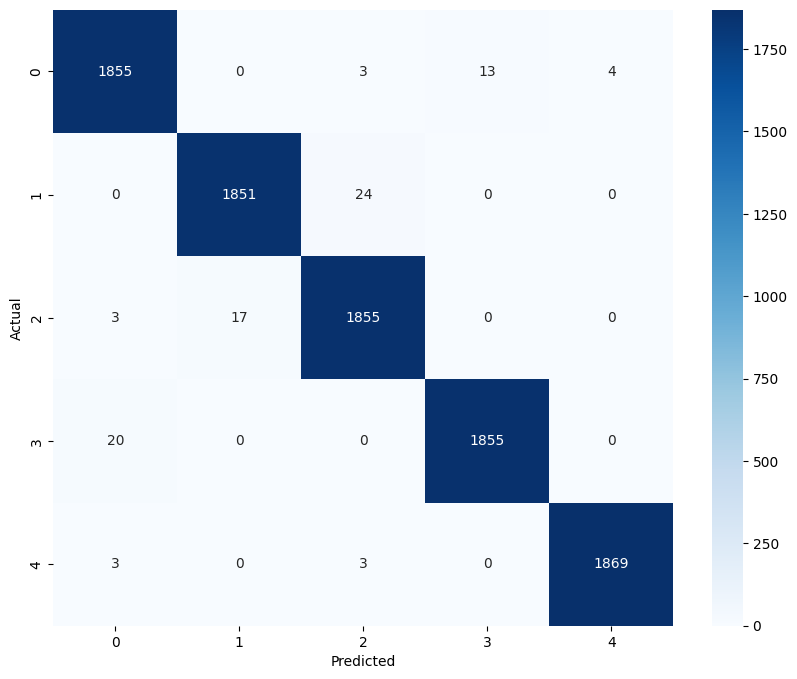

              precision    recall  f1-score   support

     Jasmine       0.99      0.99      0.99      1875
   Karacadag       0.99      0.99      0.99      1875
     Arborio       0.98      0.99      0.99      1875
     Basmati       0.99      0.99      0.99      1875
      Ipsala       1.00      1.00      1.00      1875

    accuracy                           0.99      9375
   macro avg       0.99      0.99      0.99      9375
weighted avg       0.99      0.99      0.99      9375



In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# پیش‌بینی روی داده تست
y_true = test_df['label_idx'].values
y_pred = np.argmax(model.predict(test_ds), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=list(label_to_index.keys())))


In [32]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,   
)


Epoch 1/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 70s 20ms/step - accuracy: 0.9932 - loss: 0.0199 - val_accuracy: 0.9939 - val_loss: 0.0193
Epoch 2/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 68s 19ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9926 - val_loss: 0.0217
Epoch 3/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 67s 19ms/step - accuracy: 0.9939 - loss: 0.0184 - val_accuracy: 0.9942 - val_loss: 0.0178
Epoch 4/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 67s 19ms/step - accuracy: 0.9947 - loss: 0.0166 - val_accuracy: 0.9921 - val_loss: 0.0245
Epoch 5/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 67s 19ms/step - accuracy: 0.9942 - loss: 0.0175 - val_accuracy: 0.9924 - val_loss: 0.0224
Epoch 6/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 68s 19ms/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 0.9951 - val_loss: 0.0167
Epoch 7/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 67s 19ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9937 - val_loss: 0.0208
Epoch 8/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 68s 19ms/step - accuracy: 0.9940 -

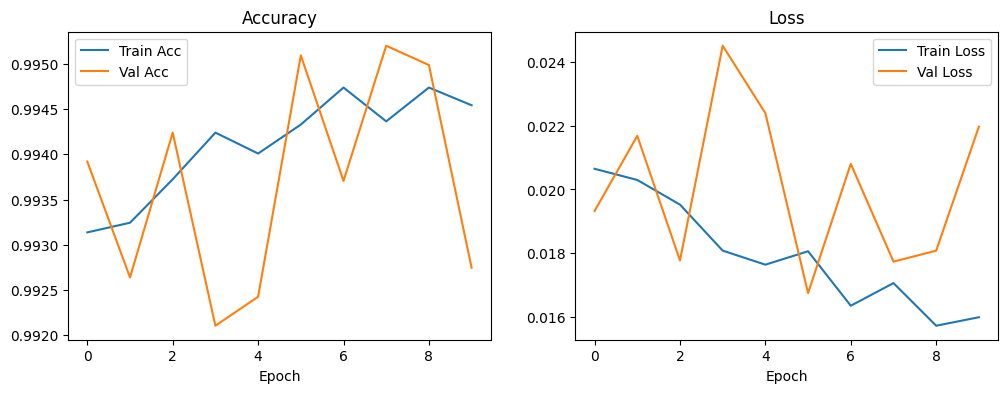

In [33]:
import matplotlib.pyplot as plt

# فرض: history متغیر خروجی fit هست
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [36]:
# ذخیره مدل
model.save("my_model.h5")

# بارگذاری مدل
from tensorflow.keras.models import load_model
loaded_model = load_model("my_model.h5")

# تست برای مطمئن شدن
loaded_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,587,207 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)